## Histograms - 1 : Find, Plot, Analyze !!!

### Goal

**Learn to**

• Find histograms, using both OpenCV and Numpy functions

• Plot histograms, using OpenCV and Matplotlib functions

• You will see these functions : cv2.calcHist(), np.histogram() etc.

### Theory

So what is histogram ? You can consider histogram as a graph or plot, which gives you an overall idea about the intensity distribution of an image. It is a plot with pixel values (ranging from 0 to 255, not always) in X-axis and corresponding number of pixels in the image on Y-axis.

It is just another way of understanding the image. By looking at the histogram of an image, you get intuition about contrast, brightness, intensity distribution etc of that image. Almost all image processing tools today, provides features on histogram. Below is an image from Cambridge in Color website, and I recommend you to visit the site for more details.

### Find Histogram

Now we have an idea on what is histogram, we can look into how to ﬁnd this. Both OpenCV and Numpy come with in-built function for this. Before using those functions, we need to understand some terminologies related with histograms.

**BINS** :The above histogram shows the number of pixels for every pixel value, ie from 0 to 255. ie you need 256 values to show the above histogram. But consider, what if you need not ﬁnd the number of pixels for all pixel values separately, but number of pixels in a interval of pixel values? say for example, you need to ﬁnd the number of pixels lying between 0 to 15, then 16 to 31, ..., 240 to 255. You will need only 16 values to represent the histogram. And that is what is shown in example given in OpenCV Tutorials on histograms.

So what you do is simply split the whole histogram to 16 sub-parts and value of each sub-part is the sum of all pixel count in it. This each sub-part is called “BIN”. In ﬁrst case, number of bins where 256 (one for each pixel) while in second case, it is only 16. BINS is represented by the term histSize in OpenCV docs.

**DIMS** : It is the number of parameters for which we collect the data. In this case, we collect data regarding only one thing, intensity value. So here it is 1.

**RANGE** : It is the range of intensity values you want to measure. Normally, it is [0,256], ie all intensity values.

**1. Histogram Calculation in OpenCV** So now we use **cv2.calcHist()** function to ﬁnd the histogram. Let’s familiarize with the function and its parameters :
```python
cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
```
1. images : it is the source image of type uint8 or ﬂoat32. it should be given in square brackets, ie, “[img]”.
2. channels : it is also given in square brackets. It the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0],[1] or [2] to calculate histogram of blue,green or red channel respectively.

3. mask : mask image. To ﬁnd histogram of full image, it is given as “None”. But if you want to ﬁnd histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)

4. histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].

5. ranges : this is our RANGE. Normally, it is [0,256].

So let’s start with a sample image. Simply load an image in grayscale mode and ﬁnd its full histogram.

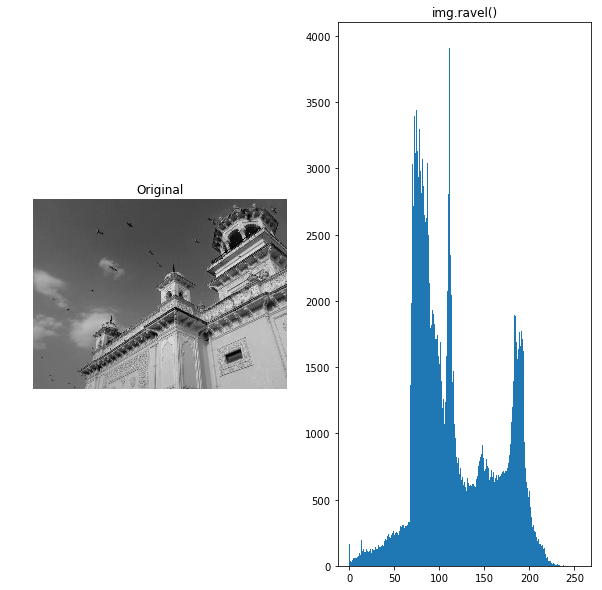

In [1]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt

img = cv2.imread('images/home.jpg',0)


plt.figure(figsize=(10,10))

plt.subplot(1,2,1), plt.imshow(img,cmap='gray')
plt.title('Original'),plt.axis("off")

plt.subplot(1,2,2), plt.hist(img.ravel(),256,[0,256])
plt.title('img.ravel()')
plt.show()

Or you can use normal plot of matplotlib, which would be good for BGR plot. For that, you need to ﬁnd the histogram data ﬁrst. Try below code:

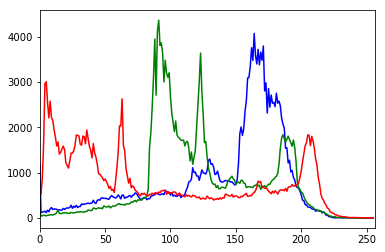

In [7]:
img = cv2.imread('images/home.jpg') 
color = ('b','g','r') 
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256]) 
    
plt.show()

You can deduct from the above graph that, blue has some high value areas in the image (obviously it should be due to the sky)

### 2. Using OpenCV
Well, here you adjust the values of histograms along with its bin values to look like x,y coordinates so that you can draw it using cv2.line() or cv2.polyline() function to generate same image as above. This is already available with OpenCV-Python2 ofﬁcial samples. Check the Code

#### Application of Mask

We used **cv2.calcHist()** to ﬁnd the histogram of the full image. What if you want to ﬁnd histograms of some regions of an image? Just create a mask image with white color on the region you want to ﬁnd histogram and black otherwise. Then pass this as the mask.

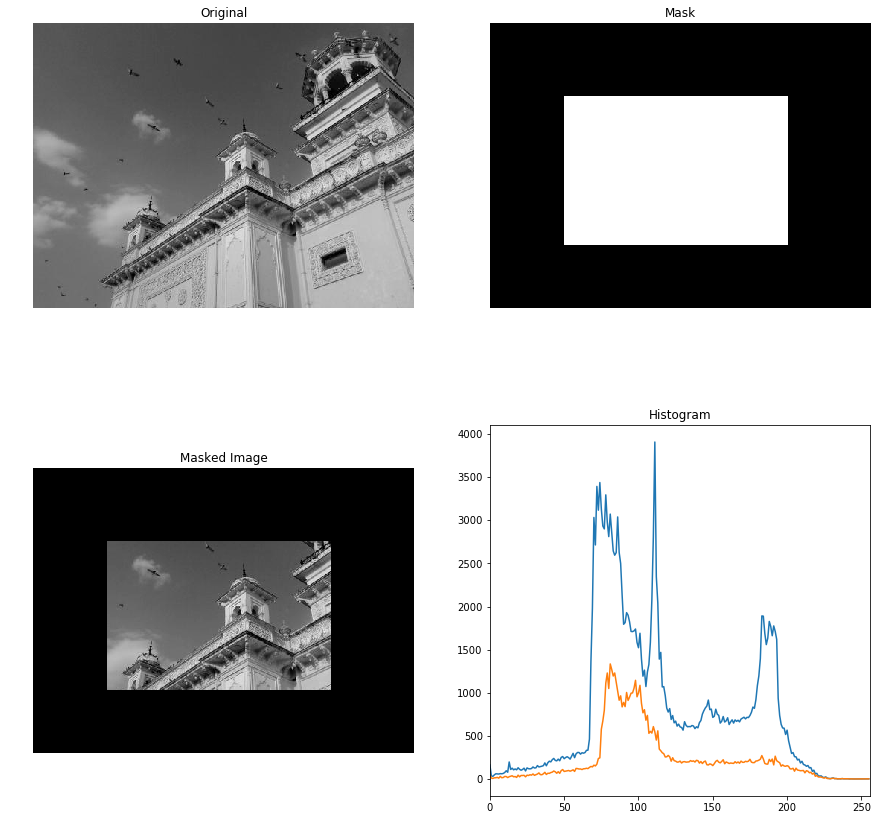

In [5]:
img = cv2.imread('images/home.jpg',0)

# create a mask 
mask = np.zeros(img.shape[:2], np.uint8) 
mask[100:300, 100:400] = 255 
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask 
# Check third argument for mask 
hist_full = cv2.calcHist([img],[0],None,[256],[0,256]) 
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

# plot
plt.figure(figsize=(15,15))

plt.subplot(221), plt.imshow(img, 'gray'),plt.title('Original'),plt.axis("off")
 
plt.subplot(222), plt.imshow(mask,'gray'),plt.title('Mask'),plt.axis("off")
 
plt.subplot(223), plt.imshow(masked_img, 'gray') ,plt.title('Masked Image'),plt.axis("off")

plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask),plt.title('Histogram')

plt.xlim([0,256])

plt.show()

### Histograms - 2: Histogram Equalization
### Goal

In this section,

• We will learn the concepts of histogram equalization and use it to improve the contrast of our images.

### Theory

Consider an image whose pixel values are conﬁned to some speciﬁc range of values only. For eg, brighter image will have all pixels conﬁned to high values. But a good image will have pixels from all regions of the image. So you need to stretch this histogram to either ends (as given in below image, from wikipedia) and that is what Histogram Equalization does (in simple words). This normally improves the contrast of the image.
![alt text][logo]

I would recommend you to read the wikipedia page on Histogram Equalization for more details about it. It has a very good explanation with worked out examples, so that you would understand almost everything after reading that. Instead, here we will see its Numpy implementation. After that, we will see OpenCV function.





[logo]:  http://docs.opencv.org/3.0-beta/_images/histogram_equalization.png
[logo2]: http://docs.opencv.org/trunk/hysteresis.jpg 


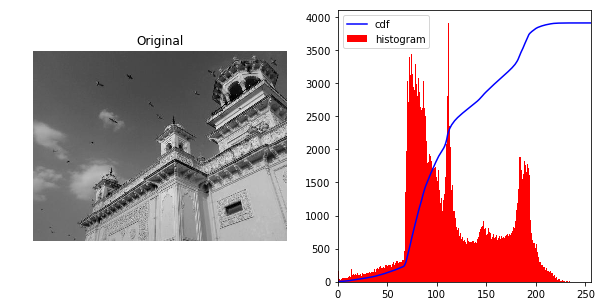

In [60]:
img = cv2.imread('images/home.jpg',0) 
hist,bins = np.histogram(img.flatten(),256,[0,256]) 
cdf = hist.cumsum() 
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.figure(figsize=(10,5))

plt.subplot(1,2,1), plt.imshow(img,cmap='gray')
plt.title('Original'),plt.axis("off")

plt.subplot(1,2,2)

plt.plot(cdf_normalized, color = 'b') 
plt.hist(img.flatten(),256,[0,256], color = 'r') 
plt.xlim([0,256]) 
plt.legend(('cdf','histogram'), loc = 'upper left') 
plt.show()

You can see histogram lies in brighter region. We need the full spectrum. For that, we need a transformation function which maps the input pixels in brighter region to output pixels in full region. That is what histogram equalization does.

Now we ﬁnd the minimum histogram value (excluding 0) and apply the histogram equalization equation as given in wiki page. But I have used here, the masked array concept array from Numpy. For masked array, all operations are performed on non-masked elements. You can read more about it from Numpy docs on masked arrays.

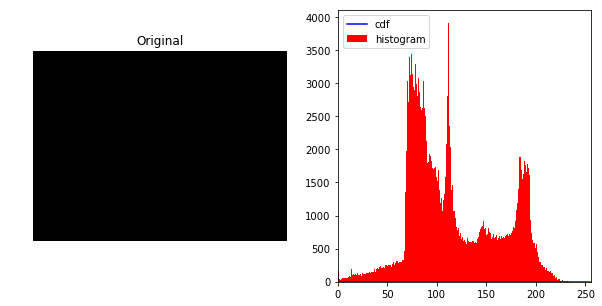

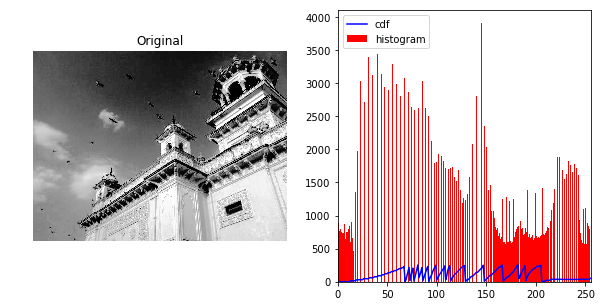

In [61]:

cdf_m = np.ma.masked_equal(cdf,0) 
cdf_m = (cdf_m - cdf_m.min()) * 255/(cdf_m.max()-cdf_m.min()) 
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]


#cdf = hist.cumsum() 
cdf_normalized = cdf * hist.max()/ cdf.max()


plt.figure(figsize=(10,5))

plt.subplot(1,2,1), plt.imshow(img2,cmap='gray')
plt.title('Original'),plt.axis("off")

plt.subplot(1,2,2)

plt.plot(cdf_normalized, color = 'b') 
plt.hist(img2.flatten(),256,[0,256], color = 'r') 
plt.xlim([0,256]) 
plt.legend(('cdf','histogram'), loc = 'upper left') 
plt.show()

Another important feature is that, even if the image was a darker image (instead of a brighter one we used), after equalization we will get almost the same image as we got. As a result, this is used as a “reference tool” to make all images with same lighting conditions. This is useful in many cases. For example, in face recognition, before training the face data, the images of faces are histogram equalized to make them all with same lighting conditions.

### Histograms Equalization in OpenCV

OpenCV has a function to do this, **cv2.equalizeHist()**. Its input is just grayscale image and output is our histogram equalized image.

Below is a simple code snippet showing its usage for same image we used :

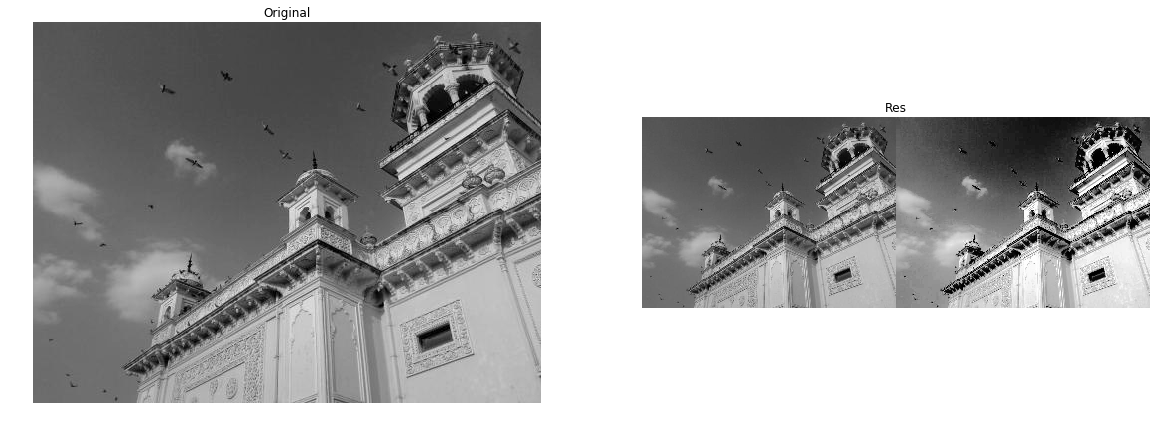

In [65]:
img = cv2.imread('images/home.jpg',0) 
equ = cv2.equalizeHist(img) 
res = np.hstack((img,equ)) #stacking images side-by-side 

# plot
plt.figure(figsize=(20,15))

plt.subplot(121), plt.imshow(img, 'gray'),plt.title('Original'),plt.axis("off")
 
plt.subplot(122), plt.imshow(res,'gray'),plt.title('Res'),plt.axis("off")

plt.show()


So now you can take different images with different light conditions, equalize it and check the results.

Histogram equalization is good when histogram of the image is conﬁned to a particular region. It won’t work good in places where there is large intensity variations where histogram covers a large region, ie both bright and dark pixels are present. Please check the SOF links in Additional Resources.

### CLAHE (Contrast Limited Adaptive Histogram Equalization)

The ﬁrst histogram equalization we just saw, considers the global contrast of the image. In many cases, it is not a good idea. For example, below image shows an input image and its result after global histogram equalization.

In [1]:
#other

## Histograms - 3 : 2D Histograms

### Goal

In this chapter, we will learn to ﬁnd and plot 2D histograms. It will be helpful in coming chapters.

### Introduction

In the ﬁrst article, we calculated and plotted one-dimensional histogram. It is called one-dimensional because we are taking only one feature into our consideration, ie grayscale intensity value of the pixel. But in two-dimensional histograms, you consider two features. Normally it is used for ﬁnding color histograms where two features are Hue & Saturation values of every pixel.

There is a python sample in the ofﬁcial samples already for ﬁnding color histograms. We will try to understand how to create such a color histogram, and it will be useful in understanding further topics like Histogram Back-Projection.

### 2D Histogram in OpenCV

It is quite simple and calculated using the same function, cv2.calcHist(). For color histograms, we need to convert the image from BGR to HSV. (Remember, for 1D histogram, we converted from BGR to Grayscale). For 2D histograms, its parameters will be modiﬁed as follows:

• channels = [0,1] because we need to process both H and S plane.

• bins = [180,256] 180 for H plane and 256 for S plane.

• range = [0,180,0,256] Hue value lies between 0 and 180 & Saturation lies between 0 and 256. Now check the code below:

In [20]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt

img = cv2.imread('images/home.jpg') 
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

hist, xbins, ybins = np.histogram2d(h.ravel(),s.ravel(),[180,256],[[0,180],[0,256]])

NameError: name 'h' is not defined

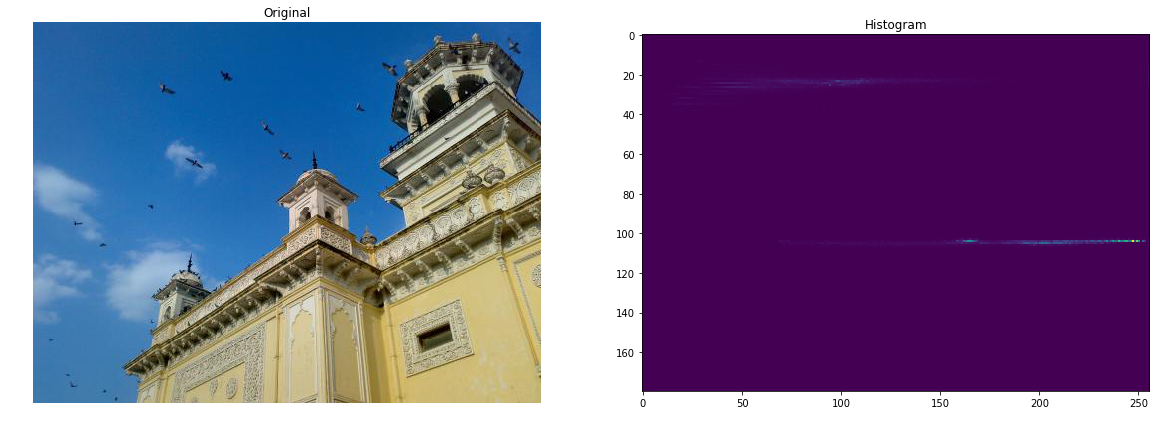

In [19]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('images/home.jpg') 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)

hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

# plot
plt.figure(figsize=(20,15))

plt.subplot(121), plt.imshow(img),plt.title('Original'),plt.axis("off")
 
plt.subplot(122),plt.imshow(hist,interpolation = 'nearest'),plt.title('Histogram')

plt.show()



### 2D Histogram in Numpy

Numpy also provides a speciﬁc function for this :** np.histogram2d()**. 
(remember, for 1D hisograms we used **np.histogram()** ).

Method - 2 : Using Matplotlib We can use matplotlib.pyplot.imshow() function to plot 2D histogram with different color maps. It gives us much more better idea about the different pixel density. But this also, doesn’t gives us idea what color is there on a ﬁrst look, unless you know the Hue values of different colors. Still I prefer this method. It is simple and better.

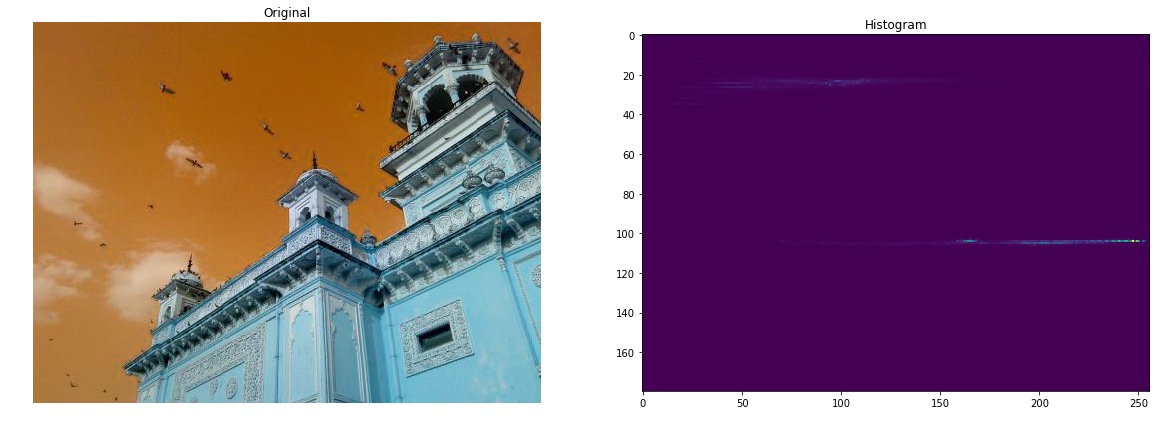

In [22]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt

img = cv2.imread('images/home.jpg') 
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV) 
hist = cv2.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )


# plot
plt.figure(figsize=(20,15))

plt.subplot(121), plt.imshow(img),plt.title('Original'),plt.axis("off")
 
plt.subplot(122),plt.imshow(hist,interpolation = 'nearest'),plt.title('Histogram')

plt.show()






## Histogram - 4 : Histogram Backprojection

### Goal

In this chapter, we will learn about histogram backprojection.

### Theory

It was proposed by** Michael J. Swain , Dana H. Ballard **in their paper **Indexing via color histograms.**

**What is it actually in simple words?** It is used for image segmentation or ﬁnding objects of interest in an image. In simple words, it creates an image of the same size (but single channel) as that of our input image, where each pixel corresponds to the probability of that pixel belonging to our object. In more simpler worlds, the output image will have our object of interest in more white compared to remaining part. Well, that is an intuitive explanation. (I can’t make it more simpler). Histogram Backprojection is used with camshift algorithm etc.

How do we do it ? We create a histogram of an image containing our object of interest (in our case, the ground, leaving player and other things). The object should ﬁll the image as far as possible for better results. And a color histogram is preferred over grayscale histogram, because color of the object is more better way to deﬁne the object than its grayscale intensity. We then “back-project” this histogram over our test image where we need to ﬁnd the object, ie in other words, we calculate the probability of every pixel belonging to the ground and show it. The resulting output on proper thresholding gives us the ground alone.

### Algorithm in Numpy

1. First we need to calculate the color histogram of both the object we need to ﬁnd (let it be ‘M’) and the image where we are going to search (let it be ‘I’).

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# roi is the object or region of objects we need to find